# BraTS, 3D MRI segmentation using U-Net

## Data exploration, visualize segmentation masks

In [30]:
import os
BASE_IMG_PATH = '../data/Task01_BrainTumour/imagesTr/'
BASE_MASK_PATH = '../data/Task01_BrainTumour/labelsTr/'

In [31]:
!ls $BASE_IMG_PATH

BRATS_001.nii.gz  BRATS_122.nii.gz  BRATS_243.nii.gz  BRATS_364.nii.gz
BRATS_002.nii.gz  BRATS_123.nii.gz  BRATS_244.nii.gz  BRATS_365.nii.gz
BRATS_003.nii.gz  BRATS_124.nii.gz  BRATS_245.nii.gz  BRATS_366.nii.gz
BRATS_004.nii.gz  BRATS_125.nii.gz  BRATS_246.nii.gz  BRATS_367.nii.gz
BRATS_005.nii.gz  BRATS_126.nii.gz  BRATS_247.nii.gz  BRATS_368.nii.gz
BRATS_006.nii.gz  BRATS_127.nii.gz  BRATS_248.nii.gz  BRATS_369.nii.gz
BRATS_007.nii.gz  BRATS_128.nii.gz  BRATS_249.nii.gz  BRATS_370.nii.gz
BRATS_008.nii.gz  BRATS_129.nii.gz  BRATS_250.nii.gz  BRATS_371.nii.gz
BRATS_009.nii.gz  BRATS_130.nii.gz  BRATS_251.nii.gz  BRATS_372.nii.gz
BRATS_010.nii.gz  BRATS_131.nii.gz  BRATS_252.nii.gz  BRATS_373.nii.gz
BRATS_011.nii.gz  BRATS_132.nii.gz  BRATS_253.nii.gz  BRATS_374.nii.gz
BRATS_012.nii.gz  BRATS_133.nii.gz  BRATS_254.nii.gz  BRATS_375.nii.gz
BRATS_013.nii.gz  BRATS_134.nii.gz  BRATS_255.nii.gz  BRATS_376.nii.gz
BRATS_014.nii.gz  BRATS_135.nii.gz  BRATS_256.nii.gz  BRATS_377.nii.gz
BRATS_

In [32]:
!ls $BASE_MASK_PATH

BRATS_001.nii.gz  BRATS_122.nii.gz  BRATS_243.nii.gz  BRATS_364.nii.gz
BRATS_002.nii.gz  BRATS_123.nii.gz  BRATS_244.nii.gz  BRATS_365.nii.gz
BRATS_003.nii.gz  BRATS_124.nii.gz  BRATS_245.nii.gz  BRATS_366.nii.gz
BRATS_004.nii.gz  BRATS_125.nii.gz  BRATS_246.nii.gz  BRATS_367.nii.gz
BRATS_005.nii.gz  BRATS_126.nii.gz  BRATS_247.nii.gz  BRATS_368.nii.gz
BRATS_006.nii.gz  BRATS_127.nii.gz  BRATS_248.nii.gz  BRATS_369.nii.gz
BRATS_007.nii.gz  BRATS_128.nii.gz  BRATS_249.nii.gz  BRATS_370.nii.gz
BRATS_008.nii.gz  BRATS_129.nii.gz  BRATS_250.nii.gz  BRATS_371.nii.gz
BRATS_009.nii.gz  BRATS_130.nii.gz  BRATS_251.nii.gz  BRATS_372.nii.gz
BRATS_010.nii.gz  BRATS_131.nii.gz  BRATS_252.nii.gz  BRATS_373.nii.gz
BRATS_011.nii.gz  BRATS_132.nii.gz  BRATS_253.nii.gz  BRATS_374.nii.gz
BRATS_012.nii.gz  BRATS_133.nii.gz  BRATS_254.nii.gz  BRATS_375.nii.gz
BRATS_013.nii.gz  BRATS_134.nii.gz  BRATS_255.nii.gz  BRATS_376.nii.gz
BRATS_014.nii.gz  BRATS_135.nii.gz  BRATS_256.nii.gz  BRATS_377.nii.gz
BRATS_

In [4]:
import glob
import nibabel as nib

In [34]:
all_img_paths = glob.glob(os.path.join(BASE_IMG_PATH,'*'))
# sort by filename
all_img_paths = sorted(all_img_paths, key=lambda x: int(os.path.basename(x).split('.')[0][6:]))
all_mask_paths = glob.glob(os.path.join(BASE_MASK_PATH,'*'))
# sort by filename
all_mask_paths = sorted(all_mask_paths, key=lambda x: int(os.path.basename(x).split('.')[0][6:]))

In [39]:
all_img_paths[:10], all_mask_paths[:10]

(['../data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_003.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_004.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_005.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_006.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_007.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_008.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_009.nii.gz',
  '../data/Task01_BrainTumour/imagesTr/BRATS_010.nii.gz'],
 ['../data/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_002.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_003.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_004.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_005.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_006.nii.gz',
  '../data/Task01_BrainTumour/labelsTr/BRATS_007.nii.gz',
  '../data/Ta

In [43]:
all_img_paths[0], all_mask_paths[0]

('../data/Task01_BrainTumour/imagesTr/BRATS_001.nii.gz',
 '../data/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz')

In [41]:
import numpy as np

In [56]:
test_image=nib.load(all_img_paths[0]).get_fdata()
# Change order of channels from [240, 240, 155, 4] to [4, 240, 240, 155]
test_image = np.transpose(test_image, (3, 0, 1, 2))
# # 0: t1, 1: t1ce, 2: t2, 3: flair
test_images = [test_image[i, :, :, :] for i in range(4)]
test_mask=nib.load(all_mask_paths[0]).get_fdata().astype(np.uint8)

In [64]:
slice_idx = 75

In [52]:
import matplotlib.pyplot as plt

In [53]:
# Image types in each 4D image
FLAIR = 0
T1_W = 1
T1_GD = 2
T2_W = 3

# Mask types
BG = 0
EDEMA = 1
NON_ENHANCING = 2
ENHANCING = 3

In [76]:
img_types = ['FLAIR', 'T1_W', 'T1_GD', 'T2_W']
mask_types = ['BG', 'EDEMA', 'NON_ENHANCING', 'ENHANCING']

In [72]:
import matplotlib.patches as mpatches

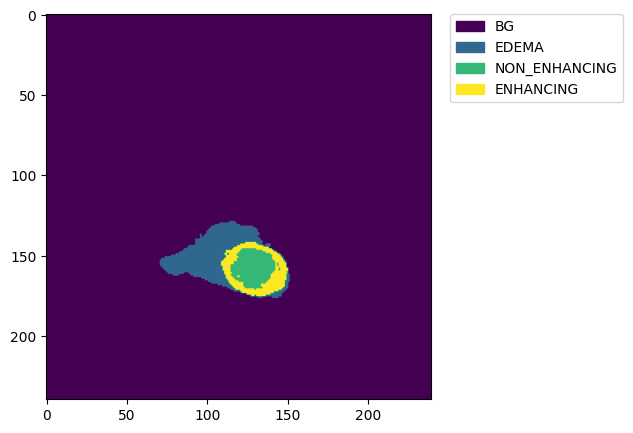

In [81]:

fix, ax = plt.subplots(1, 1, figsize=(5, 5))

data = test_mask[:, :, slice_idx]
values = np.unique(data.ravel())
im = ax.imshow(data)

# get the colors of the values, according to the 
# colormap used by imshow
colors = [im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=colors[i], label=f"{mask_types[values[i]]}") for i in range(len(values))]
# put those patched as legend-handles into the legend
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

In [121]:
def show_mask(data, ax):
    values = np.unique(data.ravel())
    im = ax.imshow(data)

    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color
    patches = [mpatches.Patch(color=colors[i], label=f"{mask_types[values[i]]}") for i in range(len(values))]
    # put those patched as legend-handles into the legend
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    ax.axis('off')


Perspective 1
[0]
0
(0.267004, 0.004874, 0.329415, 1.0)
BG
(0.267004, 0.004874, 0.329415, 1.0)


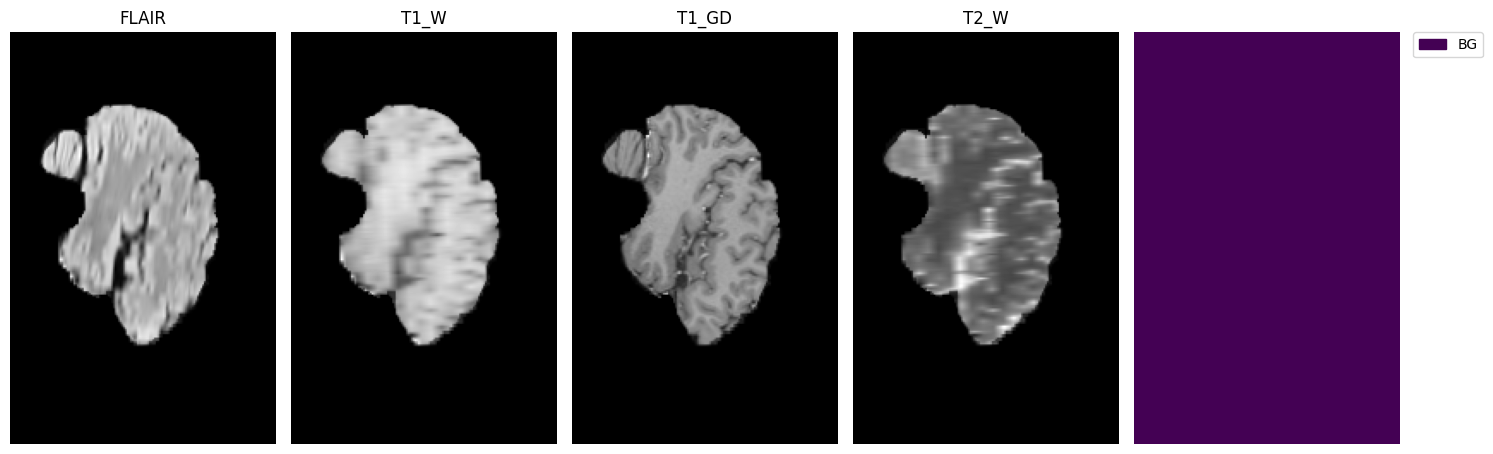

Perspective 2
[0 1]
0
(0.267004, 0.004874, 0.329415, 1.0)
1
(0.190631, 0.407061, 0.556089, 1.0)
[<matplotlib.patches.Patch object at 0x7f3a72792310>, <matplotlib.patches.Patch object at 0x7f3a72792160>]
BG
(0.267004, 0.004874, 0.329415, 1.0)
EDEMA
(0.190631, 0.407061, 0.556089, 1.0)


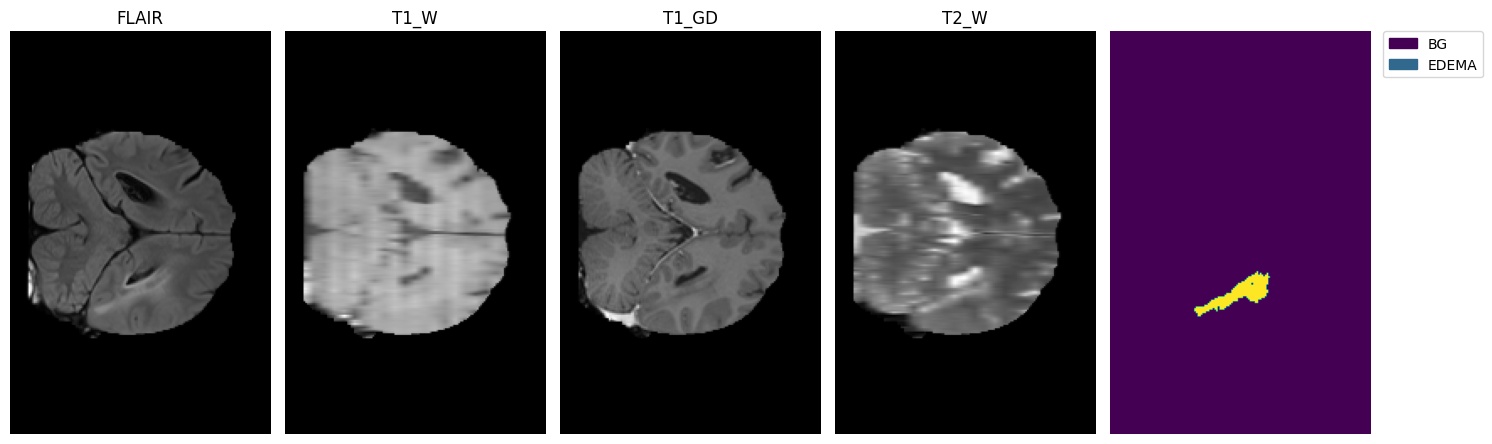

Perspective 3
[0 1 2 3]
0
(0.267004, 0.004874, 0.329415, 1.0)
1
(0.190631, 0.407061, 0.556089, 1.0)
2
(0.20803, 0.718701, 0.472873, 1.0)
3
(0.993248, 0.906157, 0.143936, 1.0)
[<matplotlib.patches.Patch object at 0x7f3a7247ce50>, <matplotlib.patches.Patch object at 0x7f3a7247c880>, <matplotlib.patches.Patch object at 0x7f3a72792160>, <matplotlib.patches.Patch object at 0x7f3a7247c1f0>]
BG
(0.267004, 0.004874, 0.329415, 1.0)
EDEMA
(0.190631, 0.407061, 0.556089, 1.0)
NON_ENHANCING
(0.20803, 0.718701, 0.472873, 1.0)
ENHANCING
(0.993248, 0.906157, 0.143936, 1.0)


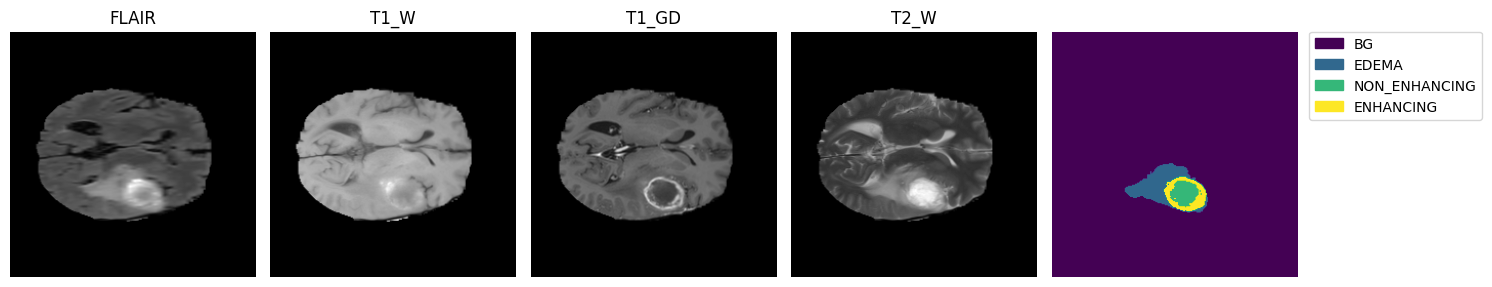

In [122]:
print("Perspective 1")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(img_types[i])
    ax[i].imshow(img[slice_idx, :, :], cmap='gray')
    ax[i].axis('off')

show_mask(test_mask[slice_idx, :, :], ax[-1])

plt.tight_layout()
plt.show()

print("Perspective 2")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(img_types[i])
    ax[i].imshow(img[:, slice_idx, :], cmap='gray')
    ax[i].axis('off')

show_mask(test_mask[:, slice_idx, :], ax[-1])

plt.tight_layout()
plt.show()

print("Perspective 3")
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(test_images):
    ax[i].set_title(img_types[i])
    ax[i].imshow(img[:, :, slice_idx], cmap='gray')
    ax[i].axis('off')

show_mask(test_mask[:, :, slice_idx], ax[-1])

plt.tight_layout()
plt.show()

In [120]:
from skimage.util import montage

In [29]:
test_image.shape

(240, 240, 155, 4)

In [24]:
test_mask.shape

(240, 240, 155)

In [28]:
np.unique(test_image)

array([   0.,    4.,    5., ..., 2641., 2644., 2660.])

In [ ]:
np.unique(test_mask)

array([0., 1., 2., 3.])

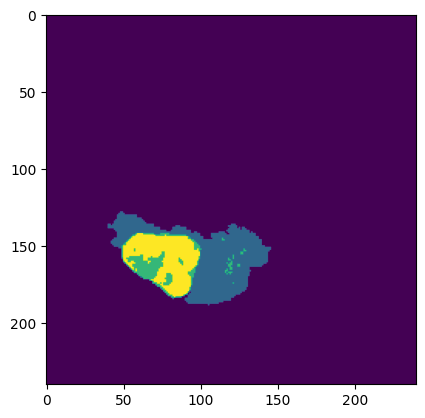

In [55]:
plt.imshow(test_mask[:,:,slice_idx])

(57600,)


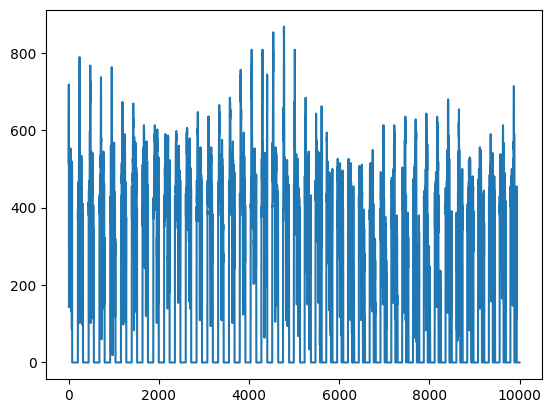

In [56]:
t1_sample = test_image[:,:,slice_idx,T1_IDX]
cpy = t1_sample.copy()
cpy = cpy.flatten()
print(cpy.shape)
plt.plot(cpy[20000:30000])

Showing slice 60 without mask


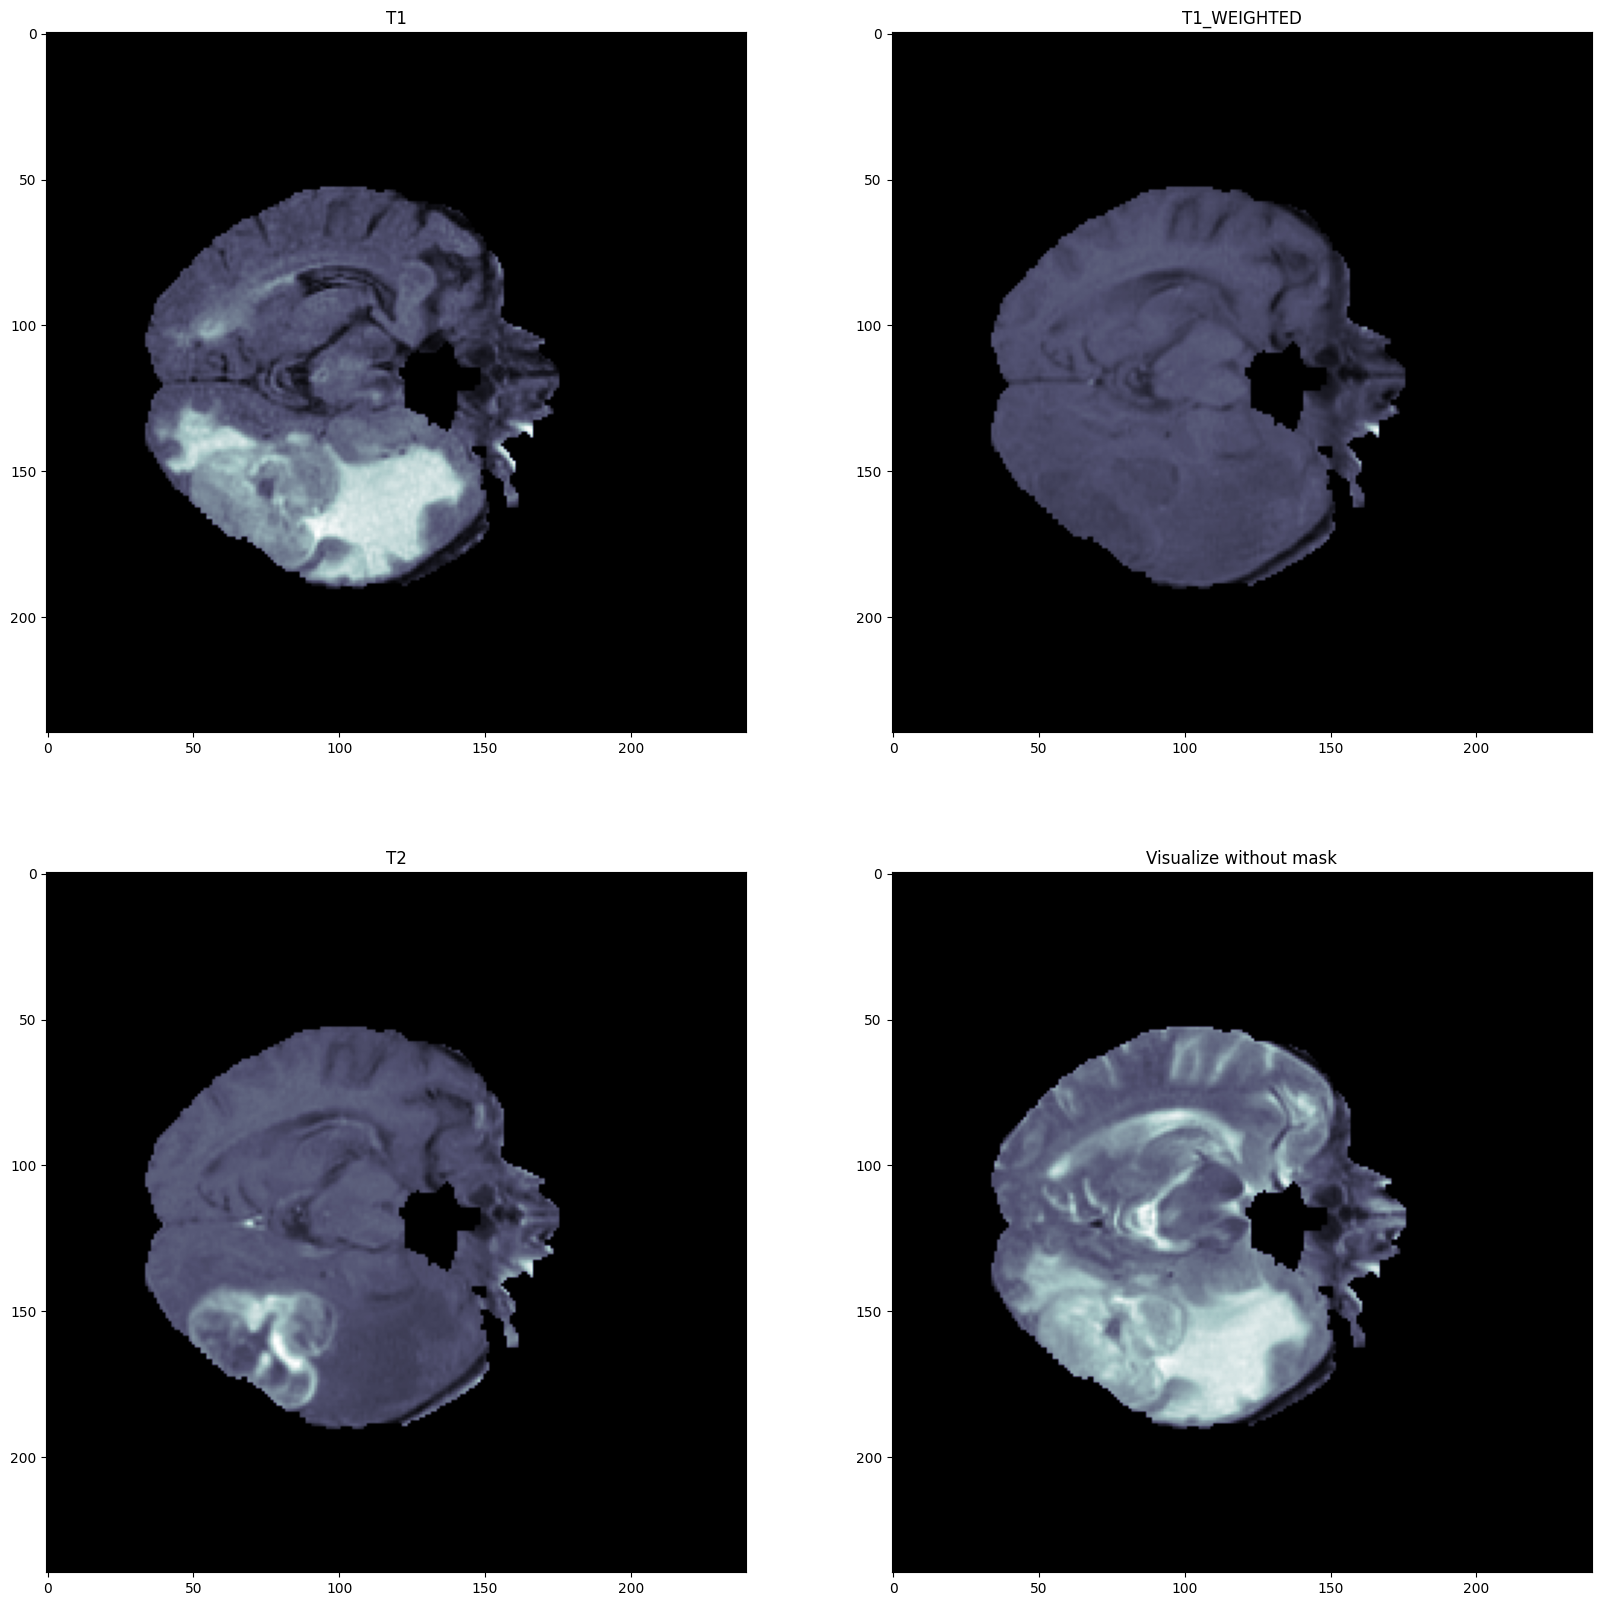

In [57]:
print(f"Showing slice {slice_idx} without mask")

fig, ax = plt.subplots(2, 2, figsize = (20, 20))
# ax.imshow(montage(test_image[:,:,:,i]), cmap ='bone')
ax[0, 0].imshow(test_image[:,:,slice_idx,T1_IDX], cmap ='bone')
ax[0, 0].set_title('T1')
ax[0, 1].imshow(test_image[:,:,slice_idx,T1_WEIGHTED_IDX], cmap ='bone')
ax[0, 1].set_title('T1_WEIGHTED')
ax[1, 0].imshow(test_image[:,:,slice_idx,T2_IDX], cmap ='bone')
ax[1, 0].set_title('T2')
ax[1, 1].imshow(test_image[:,:,slice_idx,T2_FLAIR_IDX], cmap ='bone')
ax[1, 1].set_title('T2_FLAIR')
plt.title("Visualize without mask")
plt.show()

3.0


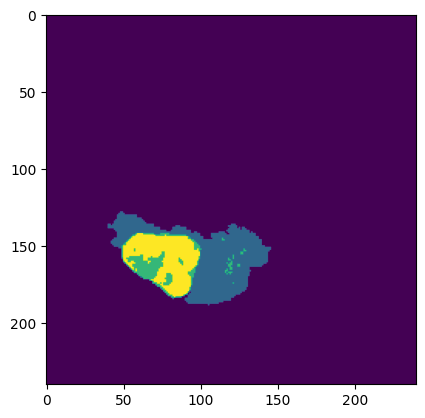

In [63]:
print(test_mask[150, 75, slice_idx])
plt.imshow(test_mask[:, :, slice_idx])

In [58]:
for i in range(4):
    print(i)

0.0
1.0
2.0
3.0


In [ ]:
np.unique(test_image)

array([   0.,    4.,    5., ..., 2641., 2644., 2660.])

## Data preparation

### TODO: Set up 5-fold cross validation

In [2]:
from sklearn.model_selection import train_test_split

# Evaluation

Use a table to list the segmentation results (Dice score and Hausdorff Dist.) for each fold, as well as the average
results of 5-fold.

Evaluation:
background (label 0), necrotic and non-enhancing tumor (label 1), peritumoral edema (label 2) and GD-enhancing
tumor (label 4). The segmentation accuracy is measured by the Dice score and the Hausdorff distance (95%) metrics
for enhancing tumor region (ET, label 4), regions of the tumor core (TC, labels 1 and 4), and the whole tumor region
(WT, labels 1,2 and 4).
4) Present a few examples of your segmentation results (an example is given below) for qualitative analysis.

## TODO: show side by side of method vs ground truth for a few slices. Show failure cases if applicable. Also make a gif traveling along axis showing successive slices and output segmentation mask